In [1]:
pip install sklearn

In [2]:
import numpy as np
import pandas as pd
import random
from IPython.display import Image
import matplotlib.pyplot as plt
import networkx as nx
nx.__version__

'2.6.3'

In [3]:
import csv
from sklearn.metrics import roc_curve, auc,roc_auc_score

In [5]:
data = pd.read_csv('/content/sample_data/CAVIAR_FULL.csv', index_col = 0)
#data = pd.read_csv('/content/sample_data/phase4.csv', index_col = 0)
data.columns = "n" + data.columns
data.index = data.columns

data

,n1,n2,n83,n3,n85,n82,n88,n89,n4,n5,n90,n86,n6,n7,n8,n9,n10,n11,n12,n76,n84,n13,n14,n15,n16,n17,n18,n77,n19,n78,n20,n87,n21,n22,n79,n23,n24,n25,n26,n27,...,n48,n49,n50,n51,n99,n52,n53,n54,n55,n56,n100,n57,n101,n58,n59,n102,n103,n104,n60,n105,n61,n62,n106,n107,n108,n63,n109,n110,n64,n65,n66,n67,n68,n69,n70,n71,n72,n73,n74,n75
n1,0,52,81,337,142,73,9,30,10,49,7,35,25,1,46,39,6,12,11,88,4,11,3,11,0,0,0,28,21,0,7,68,0,0,0,0,0,0,0,0,...,2,3,2,1,1,4,0,2,9,1,0,2,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,6,0,0,1,0,0,4,0,0,0,0,0
n2,29,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n83,6,0,0,1,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n3,152,1,5,0,29,2,2,2,0,0,1,4,0,1,21,16,0,0,21,25,0,0,1,0,0,0,0,3,0,0,0,18,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
n85,33,0,0,18,0,0,12,0,0,0,0,0,0,0,2,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# idx = data.columns.union(data.index)
# df = df.reindex(index = idx, columns=idx, fill_value=0)
# print (df)

In [7]:
G = nx.from_pandas_adjacency(data)
#nx.from_numpy_matrix(data.values)

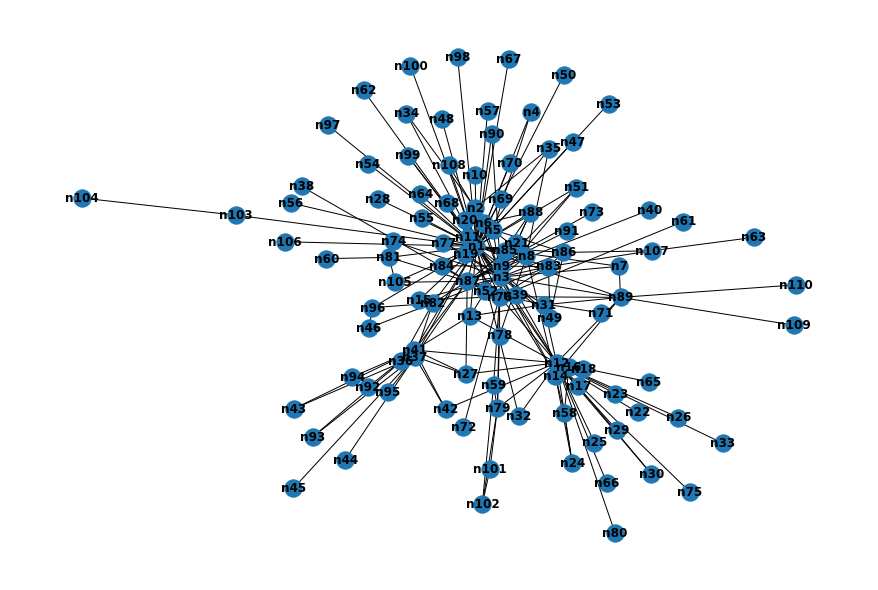

In [8]:
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,font_weight='bold')
plt.show()

In [9]:
# Remove 20% of the edges
proportion_edges = 0.2
edge_subset = random.sample(G.edges(), int(proportion_edges * G.number_of_edges()))

# Create a copy of the graph and remove the edges
G_train = G.copy()
G_train.remove_edges_from(edge_subset)

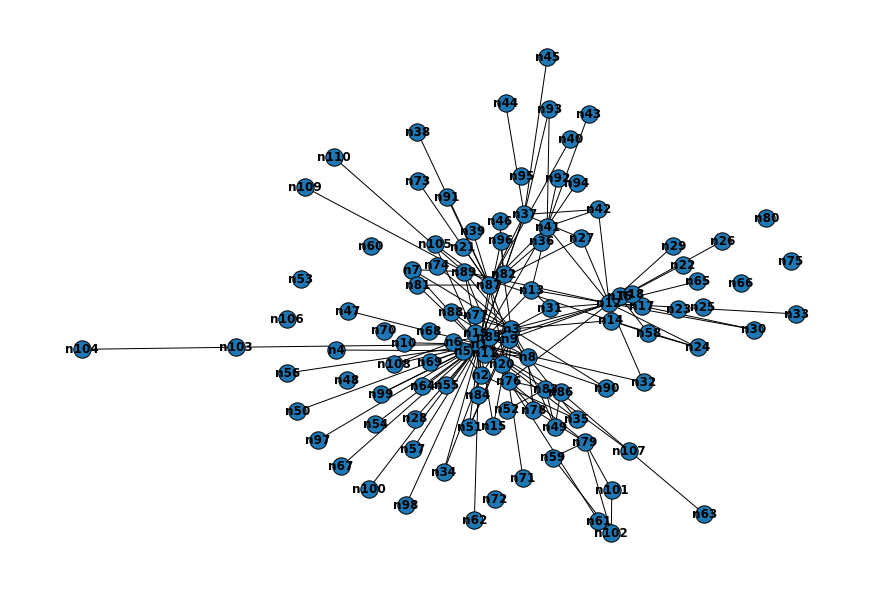

In [10]:
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G)
nx.draw(G_train,pos,with_labels=True, font_weight='bold')
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

In [11]:
n = G.number_of_nodes()
m = G.number_of_edges()
edge_subset_size = len(list(edge_subset))
print("Number of edges deleted : %d" % edge_subset_size)
print("Number of edges remaining : %d" % (m - edge_subset_size))

Number of edges deleted : 41
Number of edges remaining : 164


**Jaccard Coefficient**

In [12]:
# Make prediction using Jaccard Coefficient
pred_jaccard = list(nx.jaccard_coefficient(G_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

In [13]:
pred_jaccard

[('n21', 'n62', 0.0),
 ('n21', 'n31', 0.0),
 ('n21', 'n60', 0.0),
 ('n21', 'n34', 0.0),
 ('n21', 'n16', 0.0),
 ('n21', 'n26', 0.0),
 ('n21', 'n56', 0.0),
 ('n21', 'n30', 0.0),
 ('n21', 'n86', 0.0),
 ('n21', 'n107', 0.0),
 ('n21', 'n8', 0.0),
 ('n21', 'n46', 0.0),
 ('n21', 'n76', 0.09090909090909091),
 ('n21', 'n85', 0.0),
 ('n21', 'n35', 0.0),
 ('n21', 'n81', 0.5),
 ('n21', 'n88', 0.0),
 ('n21', 'n103', 0.0),
 ('n21', 'n17', 0.0),
 ('n21', 'n79', 0.0),
 ('n21', 'n22', 0.0),
 ('n21', 'n105', 0.5),
 ('n21', 'n67', 0.0),
 ('n21', 'n75', 0.0),
 ('n21', 'n89', 0.0),
 ('n21', 'n77', 0.0),
 ('n21', 'n40', 1.0),
 ('n21', 'n38', 1.0),
 ('n21', 'n23', 0.0),
 ('n21', 'n1', 0.02127659574468085),
 ('n21', 'n20', 0.0),
 ('n21', 'n28', 0.0),
 ('n21', 'n44', 0.0),
 ('n21', 'n15', 0.0),
 ('n21', 'n47', 0.0),
 ('n21', 'n109', 0.0),
 ('n21', 'n95', 0.0),
 ('n21', 'n51', 0.0),
 ('n21', 'n83', 0.0),
 ('n21', 'n24', 0.0),
 ('n21', 'n100', 0.0),
 ('n21', 'n39', 1.0),
 ('n21', 'n96', 0.0),
 ('n21', 'n3', 0.0)

In [14]:
# Compute the ROC AUC Score
fpr_jaccard, tpr_jaccard, _ = roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)

print(auc_jaccard)

0.6911612942390579


In [21]:
# Prediction using Adamic Adar 
pred_adamic = list(nx.adamic_adar_index(G_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_adamic])

# Compute the ROC AUC Score
fpr_adamic, tpr_adamic, _ = roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)

print(auc_adamic)

0.7752534450312634


In [22]:
pred_adamic

[('n21', 'n62', 0),
 ('n21', 'n31', 0),
 ('n21', 'n60', 0),
 ('n21', 'n34', 0),
 ('n21', 'n16', 0),
 ('n21', 'n26', 0),
 ('n21', 'n56', 0),
 ('n21', 'n30', 0),
 ('n21', 'n86', 0),
 ('n21', 'n107', 0),
 ('n21', 'n8', 0),
 ('n21', 'n46', 0),
 ('n21', 'n76', 0.36926937306885504),
 ('n21', 'n85', 0),
 ('n21', 'n35', 0),
 ('n21', 'n81', 0.36926937306885504),
 ('n21', 'n88', 0),
 ('n21', 'n103', 0),
 ('n21', 'n17', 0),
 ('n21', 'n79', 0),
 ('n21', 'n22', 0),
 ('n21', 'n105', 0.36926937306885504),
 ('n21', 'n67', 0),
 ('n21', 'n75', 0),
 ('n21', 'n89', 0),
 ('n21', 'n77', 0),
 ('n21', 'n40', 0.36926937306885504),
 ('n21', 'n38', 0.36926937306885504),
 ('n21', 'n23', 0),
 ('n21', 'n1', 0.36926937306885504),
 ('n21', 'n20', 0),
 ('n21', 'n28', 0),
 ('n21', 'n44', 0),
 ('n21', 'n15', 0),
 ('n21', 'n47', 0),
 ('n21', 'n109', 0),
 ('n21', 'n95', 0),
 ('n21', 'n51', 0),
 ('n21', 'n83', 0),
 ('n21', 'n24', 0),
 ('n21', 'n100', 0),
 ('n21', 'n39', 0.36926937306885504),
 ('n21', 'n96', 0),
 ('n21', 'n

In [16]:
# Compute the Preferential Attachment
pred_pref = list(nx.preferential_attachment(G_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref])

fpr_pref, tpr_pref, _ = roc_curve(label_pref, score_pref)
auc_pref = roc_auc_score(label_pref, score_pref)

print(auc_pref)

0.6660545539165098


In [17]:
pred_pref

[('n21', 'n62', 1),
 ('n21', 'n31', 3),
 ('n21', 'n60', 0),
 ('n21', 'n34', 2),
 ('n21', 'n16', 2),
 ('n21', 'n26', 1),
 ('n21', 'n56', 1),
 ('n21', 'n30', 2),
 ('n21', 'n86', 4),
 ('n21', 'n107', 3),
 ('n21', 'n8', 7),
 ('n21', 'n46', 2),
 ('n21', 'n76', 11),
 ('n21', 'n85', 5),
 ('n21', 'n35', 3),
 ('n21', 'n81', 2),
 ('n21', 'n88', 2),
 ('n21', 'n103', 2),
 ('n21', 'n17', 2),
 ('n21', 'n79', 5),
 ('n21', 'n22', 1),
 ('n21', 'n105', 2),
 ('n21', 'n67', 1),
 ('n21', 'n75', 0),
 ('n21', 'n89', 8),
 ('n21', 'n77', 3),
 ('n21', 'n40', 1),
 ('n21', 'n38', 1),
 ('n21', 'n23', 0),
 ('n21', 'n1', 47),
 ('n21', 'n20', 2),
 ('n21', 'n28', 1),
 ('n21', 'n44', 1),
 ('n21', 'n15', 2),
 ('n21', 'n47', 1),
 ('n21', 'n109', 1),
 ('n21', 'n95', 0),
 ('n21', 'n51', 3),
 ('n21', 'n83', 6),
 ('n21', 'n24', 3),
 ('n21', 'n100', 1),
 ('n21', 'n39', 1),
 ('n21', 'n96', 3),
 ('n21', 'n3', 24),
 ('n21', 'n98', 1),
 ('n21', 'n6', 2),
 ('n21', 'n5', 4),
 ('n21', 'n69', 1),
 ('n21', 'n92', 1),
 ('n21', 'n32', 2

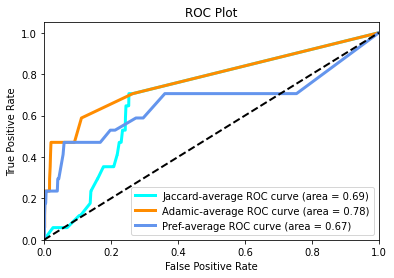

In [18]:
# Plot all ROC curves
plt.figure()
lw = 2

plt.plot(
    fpr_jaccard,
    tpr_jaccard,
    label="Jaccard-average ROC curve (area = {0:0.2f})".format(auc_jaccard),
    color="aqua",
    #linestyle=":",
    linewidth=3,
)

plt.plot(
    fpr_adamic,
    tpr_adamic,
    label="Adamic-average ROC curve (area = {0:0.2f})".format(auc_adamic),
    color="darkorange",
    linewidth=3,
)

plt.plot(
    fpr_pref,
    tpr_pref,
    label="Pref-average ROC curve (area = {0:0.2f})".format(auc_pref),
    color="cornflowerblue",
    linewidth=3,
)


plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Plot")
plt.legend(loc="lower right")
plt.show()

In [19]:
pred_pref_2 = list(nx.preferential_attachment(G))
score_pref_2, label_pref_2 = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref_2])


In [23]:
sorted(pred_adamic,key = lambda x:x[2],reverse=True)

[('n76', 'n1', 3.3994269827266423),
 ('n41', 'n37', 2.9819339427569274),
 ('n87', 'n12', 2.600232160088021),
 ('n58', 'n12', 2.352934267515801),
 ('n8', 'n2', 2.2059750296877154),
 ('n12', 'n37', 2.0802087554259465),
 ('n8', 'n76', 1.846232141630574),
 ('n1', 'n6', 1.7573530213330883),
 ('n87', 'n3', 1.7487716625175156),
 ('n14', 'n12', 1.70579555403395),
 ('n108', 'n3', 1.7024253430612348),
 ('n1', 'n49', 1.5941161274398539),
 ('n83', 'n3', 1.5870019202233552),
 ('n101', 'n59', 1.531574161186449),
 ('n3', 'n13', 1.503777729494443),
 ('n1', 'n5', 1.4498912573734875),
 ('n1', 'n104', 1.4426950408889634),
 ('n46', 'n1', 1.424137568996588),
 ('n35', 'n3', 1.3949635791016342),
 ('n1', 'n31', 1.3698137015839407),
 ('n107', 'n49', 1.279458146995729),
 ('n107', 'n1', 1.279458146995729),
 ('n42', 'n1', 1.2698261609717405),
 ('n16', 'n24', 1.2440474273221713),
 ('n27', 'n1', 1.183975920727177),
 ('n86', 'n3', 1.169969528799109),
 ('n20', 'n3', 1.169969528799109),
 ('n35', 'n5', 1.13523327692936